In [1]:
from sklearn import cluster, datasets, metrics, manifold, decomposition, random_projection 
from matplotlib import pyplot as plt
from scipy.stats import mode
from time import time
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
from sklearn.mixture import GaussianMixture
import numpy as np
import time as time
import seaborn as sns; sns.set()

# **DIGITS**

# **Kmean--digits**

best accuracy with n_comnonents :  62  with accuracy is :  0.7946577629382304


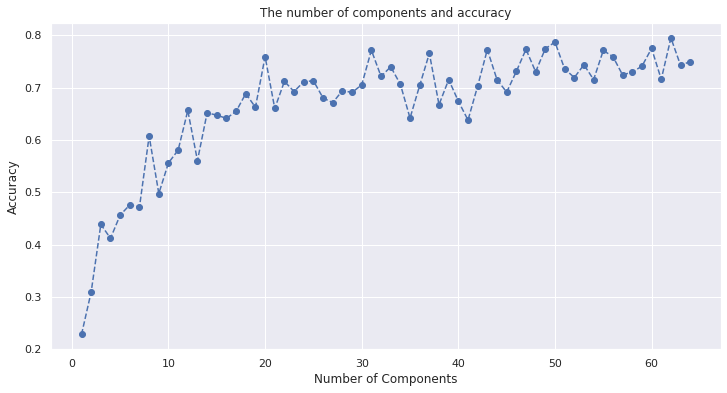

In [2]:
r = list(range(1, 65))
acc = []
for i in r:
  data = datasets.load_digits()
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  kmean = cluster.KMeans(n_clusters=10, max_iter=200)
  clusters = kmean.fit_predict(new_data)
  labels = np.zeros_like(clusters)
  for i in range(10):
      mask = (clusters == i)
      labels[mask] = mode(data.target[mask])[0]
  acc.append(metrics.accuracy_score(data.target, labels))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, acc, marker='o', linestyle='--', color='b')
n = r[acc.index(max(acc))]
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title('The number of components and accuracy')  
print ("best accuracy with n_comnonents : ", n, " with accuracy is : ", acc[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)
kmean = cluster.KMeans(n_clusters=10, max_iter=200)
clusters = kmean.fit_predict(new_data)

# **EM--digits**

best accuracy with n_comnonents :  29  with accuracy is :  0.8530884808013356


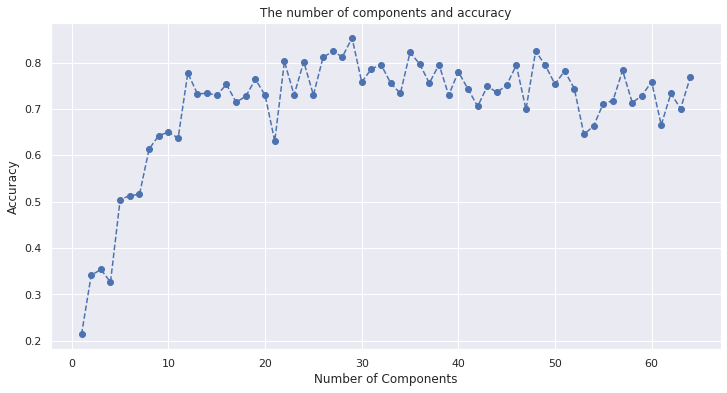

In [3]:
r = list(range(1, 65))
acc = []
for i in r:
  data = datasets.load_digits()
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  EM = GaussianMixture(n_components=10, max_iter=200)
  clusters = EM.fit_predict(new_data)
  labels = np.zeros_like(clusters)
  for i in range(10):
      mask = (clusters == i)
      labels[mask] = mode(data.target[mask])[0]
  acc.append(metrics.accuracy_score(data.target, labels))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, acc, marker='o', linestyle='--', color='b')
n = r[acc.index(max(acc))]
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title('The number of components and accuracy')  
print ("best accuracy with n_comnonents : ", n, " with accuracy is : ", acc[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)
EM = GaussianMixture(n_components=10, max_iter=200)
clusters = EM.fit_predict(new_data)

# **NN-digits--RP**

In [4]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_data, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.87      0.98      0.92        48
           2       1.00      0.93      0.96        58
           3       0.97      0.97      0.97        61
           4       0.96      0.93      0.95        58
           5       0.96      0.95      0.96        57
           6       0.96      0.98      0.97        66
           7       0.95      1.00      0.97        56
           8       0.89      0.92      0.91        53
           9       0.97      0.92      0.94        71

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

0.9528619528619529
--- 1.4879066944122314 seconds ---


# **NN--digits--clusters--data**

In [8]:
u = np.concatenate((data.data, clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.96      0.89      0.92        61
           2       0.98      0.97      0.98        67
           3       0.93      0.95      0.94        59
           4       0.98      0.96      0.97        52
           5       0.95      0.97      0.96        65
           6       0.95      0.95      0.95        66
           7       1.00      0.92      0.96        62
           8       0.78      0.96      0.86        49
           9       0.94      0.96      0.95        53

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

0.9494949494949495
--- 0.9599294662475586 seconds ---


# **NN--digits--clusters**

In [9]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(clusters.reshape(-1, 1), data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.00      0.00      0.00        67
           2       0.96      0.90      0.93        61
           3       0.00      0.00      0.00        57
           4       0.97      0.95      0.96        59
           5       0.57      0.97      0.72        70
           6       1.00      1.00      1.00        51
           7       0.80      0.88      0.84        56
           8       0.60      0.61      0.61        49
           9       0.42      0.91      0.58        65

    accuracy                           0.72       594
   macro avg       0.63      0.72      0.66       594
weighted avg       0.62      0.72      0.65       594

0.7154882154882155
--- 3.6317455768585205 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **WINE**

# **Kmean--wine**

best accuracy with n_comnonents :  2  with accuracy is :  0.7078651685393258


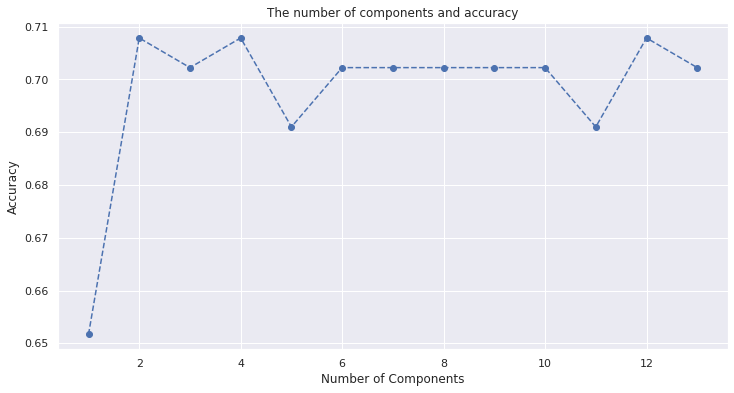

In [10]:
r = list(range(1, 14))
acc = []
for i in r:
  data = datasets.load_wine()
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  kmean = cluster.KMeans(n_clusters=3, max_iter=200)
  clusters = kmean.fit_predict(new_data)
  labels = np.zeros_like(clusters)
  for i in range(3):
      mask = (clusters == i)
      labels[mask] = mode(data.target[mask])[0]
  acc.append(metrics.accuracy_score(data.target, labels))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, acc, marker='o', linestyle='--', color='b')
n = r[acc.index(max(acc))]
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title('The number of components and accuracy')  
print ("best accuracy with n_comnonents : ", n, " with accuracy is : ", acc[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)
kmean = cluster.KMeans(n_clusters=3, max_iter=200)
clusters = kmean.fit_predict(new_data)

# **EM--wine**

best accuracy with n_comnonents :  9  with accuracy is :  0.949438202247191


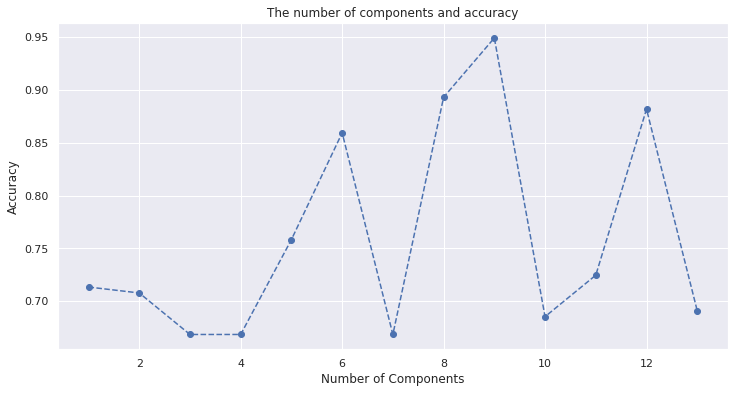

In [11]:
r = list(range(1, 14))
acc = []
for i in r:
  data = datasets.load_wine()
  rp = random_projection.GaussianRandomProjection(n_components=i)
  new_data = rp.fit_transform(data.data)
  EM = GaussianMixture(n_components=3, max_iter=200)
  clusters = EM.fit_predict(new_data)
  labels = np.zeros_like(clusters)
  for i in range(3):
      mask = (clusters == i)
      labels[mask] = mode(data.target[mask])[0]
  acc.append(metrics.accuracy_score(data.target, labels))
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(r, acc, marker='o', linestyle='--', color='b')
n = r[acc.index(max(acc))]
plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title('The number of components and accuracy')  
print ("best accuracy with n_comnonents : ", n, " with accuracy is : ", acc[n-1])
rp = random_projection.GaussianRandomProjection(n_components=n)
new_data = rp.fit_transform(data.data)
EM = GaussianMixture(n_components=3, max_iter=200)
clusters = EM.fit_predict(new_data)

# **NN--wine--RP**

In [12]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_data, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.54      0.52      0.53        29
           2       0.18      0.19      0.18        16

    accuracy                           0.54        59
   macro avg       0.57      0.57      0.57        59
weighted avg       0.55      0.54      0.55        59

0.5423728813559322
--- 0.3239915370941162 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **NN--wine--clusters--data**

In [13]:
u = np.concatenate((data.data, clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        16

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

1.0
--- 0.333113431930542 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **NN--wine--clusters**

In [14]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(clusters.reshape(-1, 1), data.target, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.83      0.90        23
           2       0.94      1.00      0.97        16

    accuracy                           0.93        59
   macro avg       0.94      0.94      0.93        59
weighted avg       0.94      0.93      0.93        59

0.9322033898305084
--- 0.31792354583740234 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
